<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1><center>Decision Trees</center></h1>

In this lab exercise, you will learn a popular machine learning algorithm, Decision Tree. You will use this classification algorithm to build a model from historical data of patients, and their response to different medications. Then you use the trained decision tree to predict the class of a unknown patient, or to find a proper drug for a new patient.

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#about_dataset">About the dataset</a></li>
        <li><a href="#downloading_data">Downloading the Data</a></li>
        <li><a href="#pre-processing">Pre-processing</a></li>
        <li><a href="#setting_up_tree">Setting up the Decision Tree</a></li>
        <li><a href="#modeling">Modeling</a></li>
        <li><a href="#prediction">Prediction</a></li>
        <li><a href="#evaluation">Evaluation</a></li>
        <li><a href="#visualization">Visualization</a></li>
    </ol>
</div>
<br>
<hr>

Import the Following Libraries:
<ul>
    <li> <b>numpy (as np)</b> </li>
    <li> <b>pandas</b> </li>
    <li> <b>DecisionTreeClassifier</b> from <b>sklearn.tree</b> </li>
</ul>

In [254]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

 


import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

<div id="about_dataset">
    <h2>About the dataset</h2>
    Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y. 
    <br>
    <br>
    Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The feature sets of this dataset are Age, Sex, Blood Pressure, and Cholesterol of patients, and the target is the drug that each patient responded to.
    <br>
    <br>
    It is a sample of binary classifier, and you can use the training part of the dataset 
    to build a decision tree, and then use it to predict the class of a unknown patient, or to prescribe it to a new patient.
</div>


<div id="downloading_data"> 
    <h2>Downloading the Data</h2>
    To download the data, we will use !wget to download it from IBM Object Storage.
</div>

In [255]:
!wget -O drug200.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv

--2019-02-13 04:39:15--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6027 (5.9K) [text/csv]
Saving to: ‘drug200.csv’

drug200.csv         100%[=====================>]   5.89K  --.-KB/s   in 0s     

2019-02-13 04:39:15 (80.1 MB/s) - ‘drug200.csv’ saved [6027/6027]



__Did you know?__ When it comes to Machine Learning, you will likely be working with large datasets. As a business, where can you host your data? IBM is offering a unique opportunity for businesses, with 10 Tb of IBM Cloud Object Storage: [Sign up now for free](http://cocl.us/ML0101EN-IBM-Offer-CC)

now, read data using pandas dataframe:

In [256]:
my_data = pd.read_csv("loan_train5.csv", delimiter=",")
my_data[0:5]

my_data = my_data.drop('Unnamed: 0', 1)
my_data = my_data.drop('Unnamed: 0.1', 1)
my_data = my_data.drop('effective_date', 1)
my_data = my_data.drop('due_date', 1)
 
 

In [257]:
my_data.dtypes 

loan_status     int64
Principal       int64
terms           int64
age             int64
education      object
Gender         object
dtype: object

In [258]:
print(my_data)

     loan_status  Principal  terms  age             education  Gender
0              1       1000     30   45  High School or Below    male
1              1       1000     30   33              Bechalor  female
2              1       1000     15   27               college    male
3              1       1000     30   28               college  female
4              1       1000     30   29               college    male
5              1       1000     30   36               college    male
6              1       1000     30   28               college    male
7              1        800     15   26               college    male
8              1        300      7   29               college    male
9              1       1000     15   39  High School or Below    male
10             1       1000     30   26               college    male
11             1        900      7   26               college  female
12             1       1000      7   27  High School or Below    male
13             1    

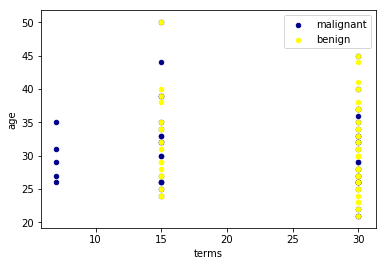

In [259]:
ax = my_data[my_data['loan_status'] == 1][0:50].plot(kind='scatter', x='terms', y='age', color='DarkBlue', label='malignant');
my_data[my_data['loan_status'] == 2][0:50].plot(kind='scatter', x='terms', y='age', color='Yellow', label='benign', ax=ax);
plt.show()

In [260]:
print(my_data)

     loan_status  Principal  terms  age             education  Gender
0              1       1000     30   45  High School or Below    male
1              1       1000     30   33              Bechalor  female
2              1       1000     15   27               college    male
3              1       1000     30   28               college  female
4              1       1000     30   29               college    male
5              1       1000     30   36               college    male
6              1       1000     30   28               college    male
7              1        800     15   26               college    male
8              1        300      7   29               college    male
9              1       1000     15   39  High School or Below    male
10             1       1000     30   26               college    male
11             1        900      7   26               college  female
12             1       1000      7   27  High School or Below    male
13             1    

<div id="practice"> 
    <h3>Practice</h3> 
    What is the size of data? 
</div>

In [261]:
X = my_data[['Principal', 'terms', 'age', 'education', 'Gender']].values
X[0:5]



from sklearn import preprocessing
 
 

le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'High School or Below', 'college' ,'Bechalor', 'Master or Above'])
X[:,3] = le_BP.transform(X[:,3])

le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'male', 'female' ])
X[:,4] = le_BP.transform(X[:,4])

 


<div href="pre-processing">
    <h2>Pre-processing</h2>
</div>

Using <b>my_data</b> as the Drug.csv data read by pandas, declare the following variables: <br>

<ul>
    <li> <b> X </b> as the <b> Feature Matrix </b> (data of my_data) </li>
    <li> <b> y </b> as the <b> response vector (target) </b> </li>
</ul>

Remove the column containing the target name since it doesn't contain numeric values.

In [262]:
y = my_data["loan_status"]
y[0:300]

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
270    2
271    2
272    2
273    2
274    2
275    2
276    2
277    2
278    2
279    2
280    2
281    2
282    2
283    2
284    2
285    2
286    2
287    2
288    2
289    2
290    2
291    2
292    2
293    2
294    2
295    2
296    2
297    2
298    2
299    2
Name: loan_status, Length: 300, dtype: int64

As you may figure out, some features in this dataset are categorical such as __Sex__ or __BP__. Unfortunately, Sklearn Decision Trees do not handle categorical variables. But still we can convert these features to numerical values. __pandas.get_dummies()__
Convert categorical variable into dummy/indicator variables.

Now we can fill the target variable.

In [263]:
y [0:5]

0    1
1    1
2    1
3    1
4    1
Name: loan_status, dtype: int64

<hr>

<div id="setting_up_tree">
    <h2>Setting up the Decision Tree</h2>
    We will be using <b>train/test split</b> on our <b>decision tree</b>. Let's import <b>train_test_split</b> from <b>sklearn.cross_validation</b>.
</div>

In [264]:
from sklearn.model_selection import train_test_split

Now <b> train_test_split </b> will return 4 different parameters. We will name them:<br>
X_trainset, X_testset, y_trainset, y_testset <br> <br>
The <b> train_test_split </b> will need the parameters: <br>
X, y, test_size=0.3, and random_state=3. <br> <br>
The <b>X</b> and <b>y</b> are the arrays required before the split, the <b>test_size</b> represents the ratio of the testing dataset, and the <b>random_state</b> ensures that we obtain the same splits.

In [265]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

<h3>Practice</h3>
Print the shape of X_trainset and y_trainset. Ensure that the dimensions match

In [266]:
 
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


Train set: (276, 5) (276,)
Test set: (70, 5) (70,)


Print the shape of X_testset and y_testset. Ensure that the dimensions match

In [267]:
 
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

/home/jupyterlab/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [268]:
yhat = clf.predict(X_test)
yhat [0:300]

array([1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [269]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [270]:
 def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           1       0.78      0.95      0.85        55
           2       0.00      0.00      0.00        15

   micro avg       0.74      0.74      0.74        70
   macro avg       0.39      0.47      0.43        70
weighted avg       0.61      0.74      0.67        70

Confusion matrix, without normalization
[[52  3]
 [15  0]]


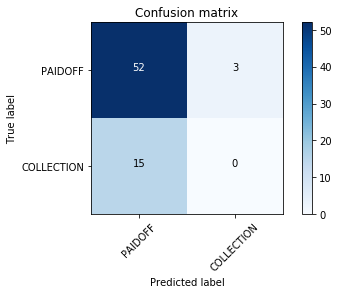

In [271]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,2])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['PAIDOFF','COLLECTION'],normalize= False,  title='Confusion matrix')

In [272]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

In [272]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.6697892271662764